In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Aim is to predict the marks of students of the test data

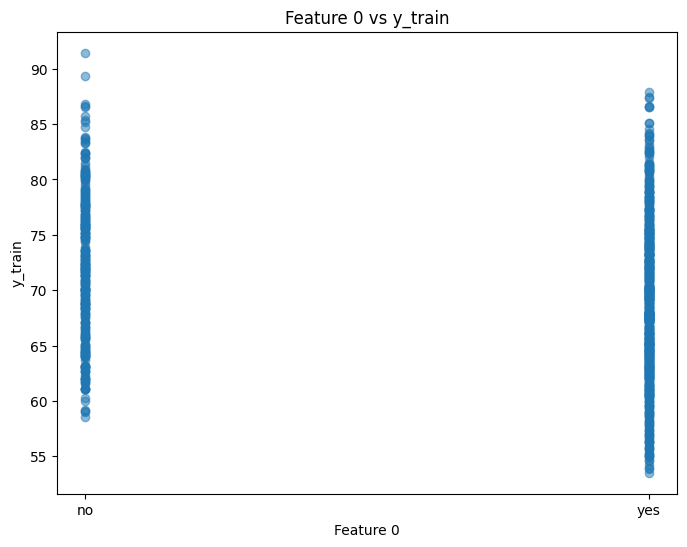

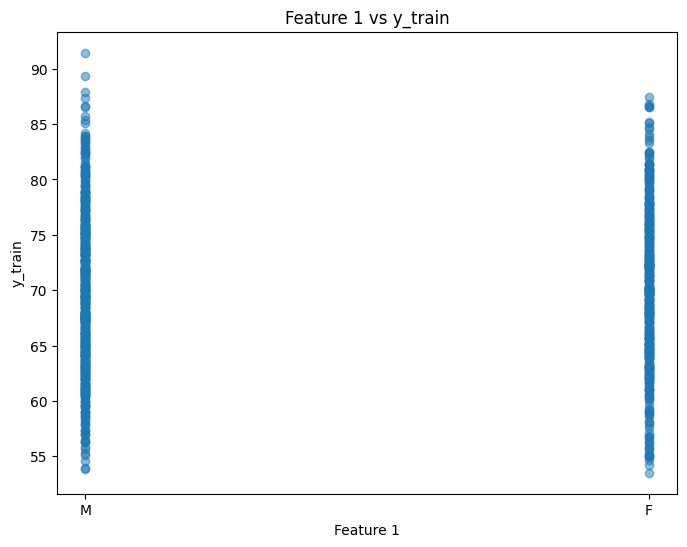

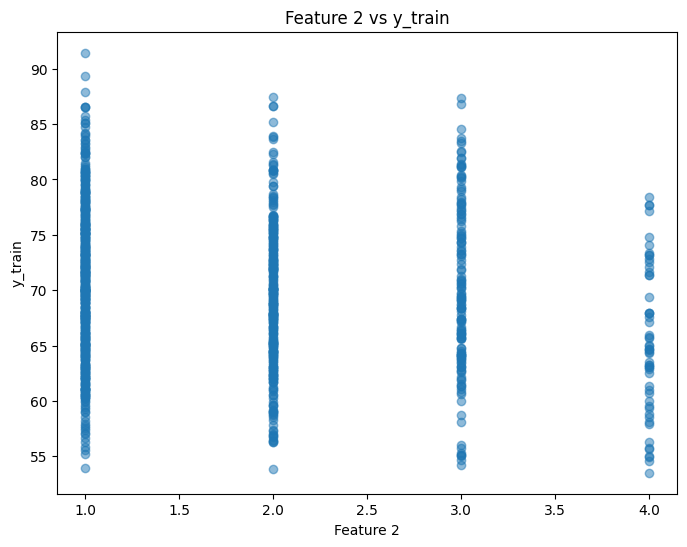

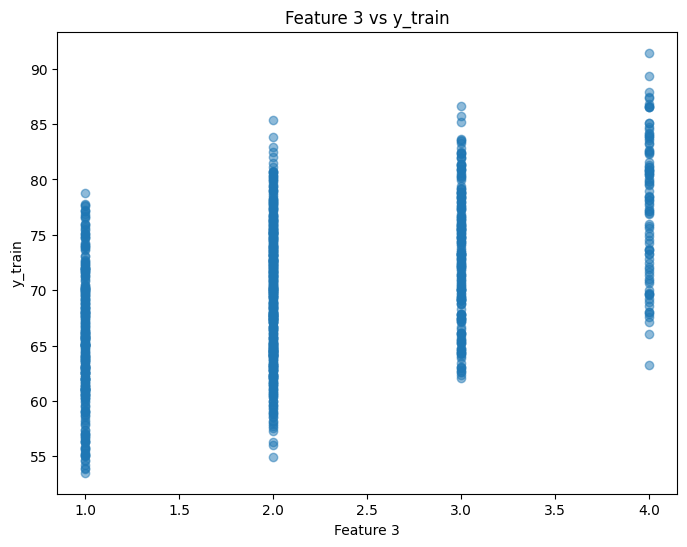

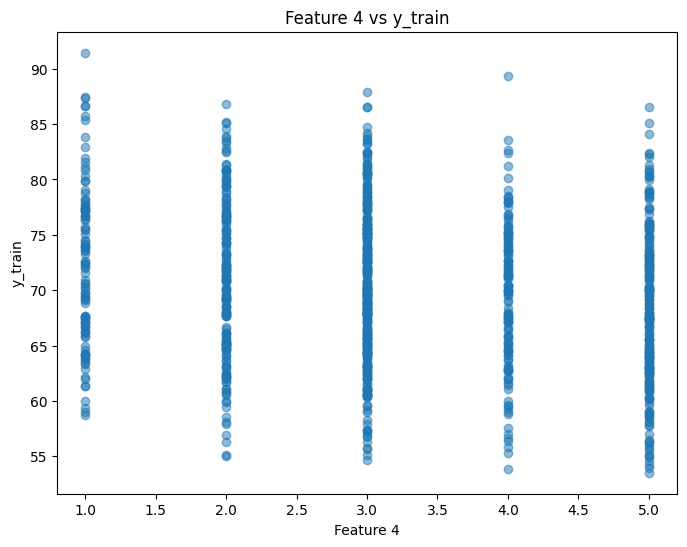

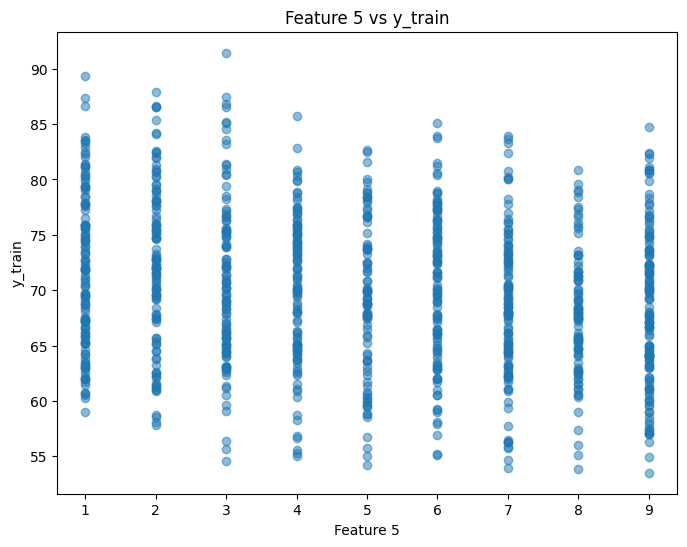

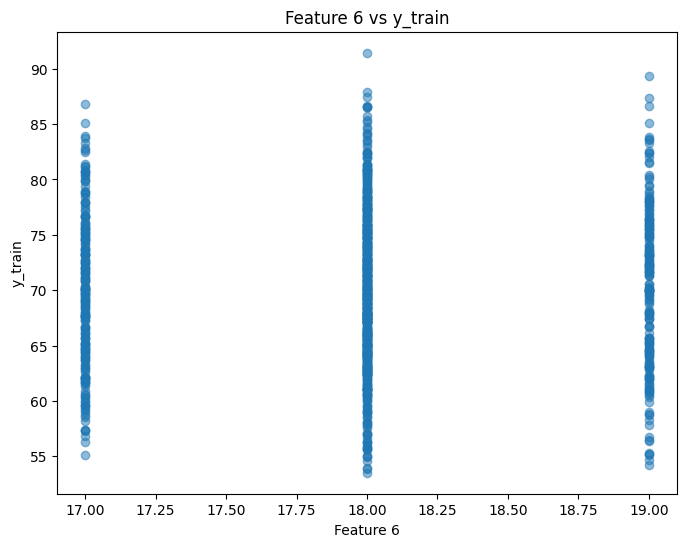

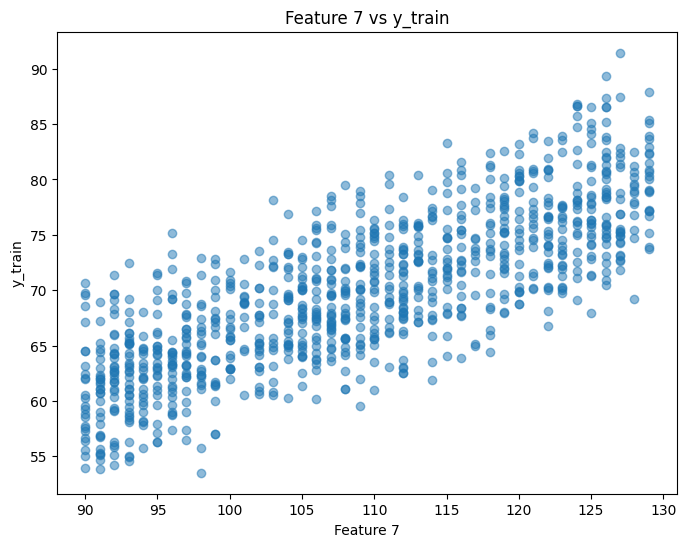

In [33]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
def plot_features(x_train, y_train):
    num_features = x_train.shape[1]
    for i in range(num_features):
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train[:, i], y_train, alpha=0.5)
        plt.xlabel(f'Feature {i}')
        plt.ylabel('y_train')
        plt.title(f'Feature {i} vs y_train')
        plt.show()

plot_features(x_train, y_train)

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    new_features = []
    for i in range(x_train.shape[1]): # Fixed indentation here
        # Check if the feature is numeric before applying the power operation
        if np.issubdtype(x_train[:, i].dtype, np.number):
            new_features.append(x_train[:, i] ** 2)  # Add squared feature
        else:
            # Handle non-numeric features (e.g., using LabelEncoder)
            le = LabelEncoder()
            new_features.append(le.fit_transform(x_train[:, i]))

    new_features = np.array(new_features).T
    x_train = np.concatenate([x_train, new_features], axis=1)
    return x_train # Added a return statement

x_train = feature_changing(x_train)

In [34]:
def z_score(x):
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_norm = (x - x_mean) / x_std
    return x_norm, x_std, x_mean

In [35]:
def feature_changing(x):
    new_features = []
    label_encoders = {}
    for i in range(x.shape[1]):
        if np.issubdtype(x[:, i].dtype, np.number):
            new_features.append(x[:, i] ** 2)
        else:
            le = LabelEncoder()
            x[:, i] = le.fit_transform(x[:, i])
            new_features.append(x[:, i])
            label_encoders[i] = le

    new_features = np.array(new_features).T
    x = np.concatenate([x, new_features], axis=1)
    return x, label_encoders


In [36]:
def cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

In [37]:
def gradient_descent(X, y, w, b, alpha=0.01, num_iterations=1000):
    m = X.shape[0]
    for i in range(num_iterations):
        predictions = np.dot(X, w) + b
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        w = w - alpha * dw
        b = b - alpha * db
    return w, b

In [38]:
data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

x_train, train_label_encoders = feature_changing(x_train)
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

old_cost = float('inf')
tolerance = 0.00001

while abs(old_cost - cost(x_train, y_train, w, b)) > tolerance:
    old_cost = cost(x_train, y_train, w, b)
    w, b = gradient_descent(x_train, y_train, w, b)

test_data = pd.read_excel('Test data.xlsx')
x_predict = np.array(test_data.iloc[:, :8])


for i in range(x_predict.shape[1]):
    if i in train_label_encoders:
        le = train_label_encoders[i]
        x_predict[:, i] = le.transform(x_predict[:, i])

x_predict, _ = feature_changing(x_predict)
x_predict = x_predict.astype(np.float64)
x_predict = (x_predict - x_mean) / x_std

ans = test_data.iloc[:, 8].to_numpy()
y_predict = np.dot(x_predict, w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:
        accuracy += 1
accuracy = round(accuracy * 100 / len(ans), 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
